In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay 

import warnings
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv('diamonds.csv')

In [38]:
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [39]:
df = df.drop('Unnamed: 0', axis=1)

In [40]:

cut_map = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}

df['cut'] = df['cut'].map(cut_map)

In [41]:

color_map = {
    'D': 0,
    'E': 1,
    'F': 2,
    'G': 3,
    'H': 4,
    'I': 5,
    'J': 6
}

df['color'] = df['color'].map(color_map)

In [42]:

clarity_map = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

df['clarity'] = df['clarity'].map(clarity_map)

In [44]:
scaler = StandardScaler()
df = df.copy()
df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']] = scaler.fit_transform(df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])

In [45]:
# Features
X = df.drop('cut', axis=1)

# Target
y = df['cut']

In [46]:
X

,carat,color,clarity,depth,table,price,x,y,z
0,-1.198168,1,1,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,1,2,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,1,4,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,5,3,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,6,1,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...,...,...
53935,-0.164427,0,2,-0.662711,-0.204605,-0.294731,0.016798,0.022304,-0.054888
53936,-0.164427,0,2,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988
53937,-0.206621,0,2,0.733344,1.137995,-0.294731,-0.063434,-0.047741,0.030135
53938,0.130927,4,1,-0.523105,0.242928,-0.294731,0.373383,0.337506,0.285204


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25,
                                                    random_state = 0,
                                                    shuffle = True)

In [90]:
model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=15)

In [91]:
predictionsLR = modelLR.predict(X_test)

In [92]:
print(modelLR.score(X_test,y_test))

0.6512421208750463


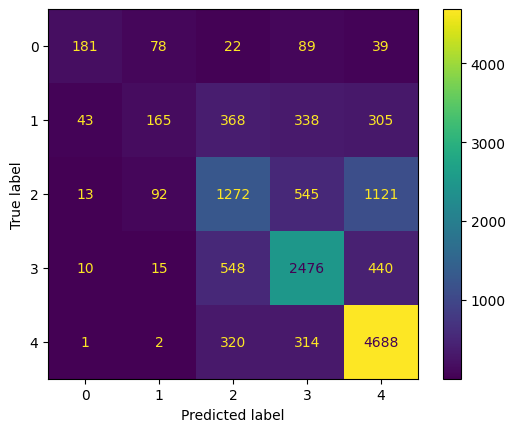

In [93]:
cmlr= confusion_matrix(y_test, predictionsLR)
ConfusionMatrixDisplay(cmlr).plot()

In [54]:
print(classification_report(y_test, predictionsLR))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55       409
           1       0.47      0.14      0.21      1219
           2       0.50      0.42      0.46      3043
           3       0.66      0.71      0.68      3489
           4       0.71      0.88      0.79      5325

    accuracy                           0.65     13485
   macro avg       0.61      0.52      0.54     13485
weighted avg       0.63      0.65      0.63     13485



In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score
precisionLR = precision_score(y_test, predictionsLR, average='micro')
recallLR = recall_score(y_test, predictionsLR, average='micro')
f1LR = f1_score(y_test, predictionsLR, average='micro')

print(f'Precision: {precisionLR:.2f}')
print(f'Recall: {recallLR:.2f}')
print(f'F1-score: {f1LR:.2f}')

Precision: 0.65
Recall: 0.65
F1-score: 0.65


### KNN Classifier

In [59]:
err_rate = []
accuracy = []

# Calculate multiple models:
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predictionsKNN = knn.predict(X_test)

    # and Track the results!
    err_rate.append(np.mean(predictionsKNN != y_test)) # another way to calculate the error rate
    accuracy.append(knn.score(X_test, y_test))

In [63]:
best_k = accuracy.index(max(accuracy)) + 1  # +1 because index starts at 0
print(f"Best k: {best_k} with accuracy: {max(accuracy):.2f}")

Best k: 24 with accuracy: 0.67


In [64]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
predictions_best = knn_best.predict(X_test)

In [73]:
print(knn_best.score(X_test,y_test))

0.6668891360771227


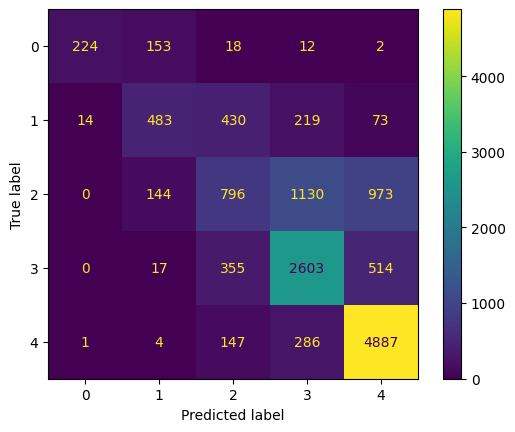

In [65]:
cm = confusion_matrix(y_test, predictions_best)
ConfusionMatrixDisplay(cm).plot()

In [69]:
print(classification_report(y_test, predictions_best))

              precision    recall  f1-score   support

           0       0.94      0.55      0.69       409
           1       0.60      0.40      0.48      1219
           2       0.46      0.26      0.33      3043
           3       0.61      0.75      0.67      3489
           4       0.76      0.92      0.83      5325

    accuracy                           0.67     13485
   macro avg       0.67      0.57      0.60     13485
weighted avg       0.64      0.67      0.64     13485



In [70]:
precisionKNN = precision_score(y_test, predictions_best, average='weighted')
recallKNN = recall_score(y_test, predictions_best, average='weighted')
f1KNN = f1_score(y_test, predictions_best, average='weighted')

print(f"Precision: {precisionKNN:.2f}")
print(f"Recall: {recallKNN:.2f}")
print(f"F1 Score: {f1KNN:.2f}")

Precision: 0.64
Recall: 0.67
F1 Score: 0.64


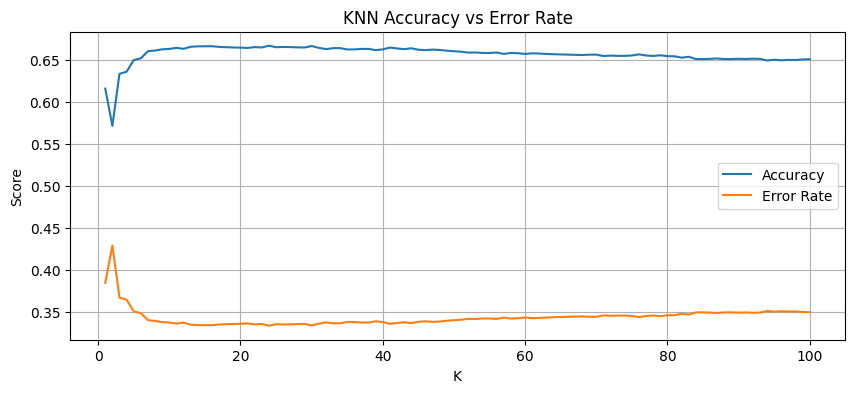

In [75]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 101), accuracy, label='Accuracy')
plt.plot(range(1, 101), err_rate, label='Error Rate')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('KNN Accuracy vs Error Rate')
plt.legend()
plt.grid()
plt.show()

### SVC Model 

In [78]:
best_score = 0
best_model = None
best_params = {}

for kernel in ['linear', 'rbf', 'poly']:
    for C in [0.1, 1, 10]:
        gamma = 'scale' if kernel != 'linear' else 'auto'
        modelsvc = SVC(kernel=kernel, C=C, gamma=gamma, random_state=15)
        modelsvc.fit(X_train, y_train)
        y_predsvc = modelsvc.predict(X_test)
        acc = accuracy_score(y_test, y_predsvc)
    
        # Track best model
        if acc > best_score:
            best_score = acc
            best_model = modelsvc
            best_params = {'kernel': kernel, 'C': C, 'gamma': gamma}

print("\n Best SVC Model:")
print(f"Kernel: {best_params['kernel']}, C: {best_params['C']}, Gamma: {best_params['gamma']}")
print(f"Best Accuracy: {best_score:.4f}")


 Best SVC Model:
Kernel: rbf, C: 10, Gamma: scale
Best Accuracy: 0.7628


In [79]:
svc_best = SVC(kernel='rbf', C=10, gamma='scale', random_state=15)
svc_best.fit(X_train, y_train)
predictions_bestsvc = svc_best.predict(X_test)

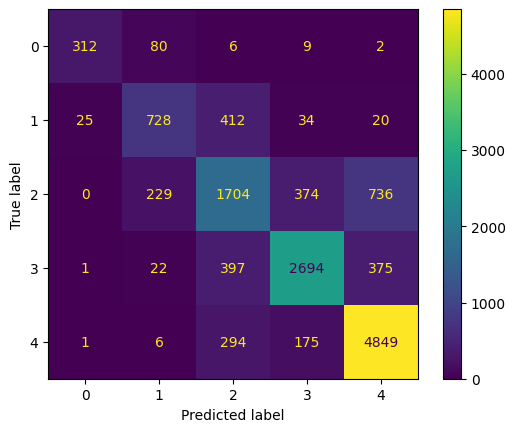

In [80]:
cmsvc = confusion_matrix(y_test, predictions_bestsvc)
ConfusionMatrixDisplay(cmsvc).plot()

In [81]:
print(classification_report(y_test, predictions_bestsvc))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       409
           1       0.68      0.60      0.64      1219
           2       0.61      0.56      0.58      3043
           3       0.82      0.77      0.80      3489
           4       0.81      0.91      0.86      5325

    accuracy                           0.76     13485
   macro avg       0.77      0.72      0.74     13485
weighted avg       0.76      0.76      0.76     13485



In [82]:
precisionSVC = precision_score(y_test, predictions_bestsvc, average='weighted')
recallSVC = recall_score(y_test, predictions_bestsvc, average='weighted')
f1SVC = f1_score(y_test, predictions_bestsvc, average='weighted')

print(f"Precision: {precisionSVC:.2f}")
print(f"Recall: {recallSVC:.2f}")
print(f"F1 Score: {f1SVC:.2f}")

Precision: 0.76
Recall: 0.76
F1 Score: 0.76


### Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 1000)
modelTree.fit(X_train, y_train)
y_predT = modelTree.predict(X_test)
accuracyT = accuracy_score(y_test, y_predT)
con_matrixT = confusion_matrix(y_test, y_predT)

print('Decision Tree Accuracy:', accuracyT) 
print('Decision Tree Matrix:\n', con_matrixT) 

Decision Tree Accuracy: 0.7636633296255099
Decision Tree Matrix:
 [[ 356   34    9    8    2]
 [  38  806  279   77   19]
 [   4  183 1647  533  676]
 [   7   39  377 2678  388]
 [   3   11  297  203 4811]]


In [124]:
precisionT = precision_score(y_test, y_predT, average='macro') 
recallT = recall_score(y_test, y_predT, average='macro')
f1T = f1_score(y_test, y_predT, average='macro')

print(f"Accuracy: {accuracyT:.4f}")
print(f"Precision: {precisionT:.4f}")
print(f"Recall: {recallT:.4f}")
print(f"F1-score: {f1T:.4f}")

Accuracy: 0.7637
Precision: 0.7673
Recall: 0.7488
F1-score: 0.7563


### Random Forest Classifier

In [85]:
modelRF = RandomForestClassifier(n_estimators = 10, bootstrap = True)
modelRF.fit(X_train, y_train)
y_predRF = modelRF.predict(X_test)
accuracyRF = accuracy_score(y_test, y_predRF)
con_matrixRF= confusion_matrix(y_test, y_predRF)

print('Random Forest Accuracy:', accuracyRF) 
print('Random Forest Matrix:\n', con_matrixRF) 

Random Forest Accuracy: 0.7632183908045977
Random Forest Matrix:
 [[ 359   33    6    9    2]
 [  49  849  244   57   20]
 [   4  245 1655  533  606]
 [   2   27  382 2728  350]
 [   1   14  364  245 4701]]


In [125]:
precisionRF = precision_score(y_test, y_predRF, average='weighted')  # can also use 'macro' or 'micro'
recallRF = recall_score(y_test, y_predRF, average='weighted')
f1RF = f1_score(y_test, y_predRF, average='weighted')

# Print all metrics
print(f"Accuracy: {accuracyRF:.4f}")
print(f"Precision: {precisionRF:.4f}")
print(f"Recall: {recallRF:.4f}")
print(f"F1 Score: {f1RF:.4f}")

Accuracy: 0.7632
Precision: 0.7573
Recall: 0.7632
F1 Score: 0.7592


### ANN

In [110]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint


modelANNKeras = Sequential()

# Input + first hidden layer
modelANNKeras.add(Dense(units=16, activation='relu', input_shape=(9,), kernel_initializer='uniform'))
modelANNKeras.add(Dropout(0.05))

# Second hidden layer (optional)
modelANNKeras.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
modelANNKeras.add(Dropout(0.05))

# Output layer for 4 classes
modelANNKeras.add(Dense(units=5, activation='softmax', kernel_initializer='uniform'))

# Compile the model (use sparse_* if labels are integers)
modelANNKeras.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',  
                      metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, verbose=1)

# Save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')


# Train the model
modelANNKeras.fit(X_train, y_train,
                  batch_size=32,
                  epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[early_stop, checkpoint],
                  verbose=1)

Epoch 1/100
1264/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4956 - loss: 1.2471

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4957 - loss: 1.2469 - val_accuracy: 0.6061 - val_loss: 1.0228
Epoch 2/100
1254/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6182 - loss: 0.9967

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6183 - loss: 0.9963 - val_accuracy: 0.6801 - val_loss: 0.8638
Epoch 3/100
1258/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6707 - loss: 0.8692

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6708 - loss: 0.8691 - val_accuracy: 0.6988 - val_loss: 0.8051
Epoch 4/100
1258/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6913 - loss: 0.8250

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6913 - loss: 0.8250 - val_accuracy: 0.7059 - val_loss: 0.7841
Epoch 5/100
1260/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6947 - loss: 0.8039

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6947 - loss: 0.8039 - val_accuracy: 0.7086 - val_loss: 0.7742
Epoch 6/100
1256/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6922 - loss: 0.8094

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6922 - loss: 0.8094 - val_accuracy: 0.7092 - val_loss: 0.7692
Epoch 7/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7001 - loss: 0.7928 - val_accuracy: 0.7082 - val_loss: 0.7675
Epoch 8/100
1258/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6982 - loss: 0.7936

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6982 - loss: 0.7936 - val_accuracy: 0.7110 - val_loss: 0.7595
Epoch 9/100
1258/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6987 - loss: 0.7837

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.7837 - val_accuracy: 0.7115 - val_loss: 0.7590
Epoch 10/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7055 - loss: 0.7753 - val_accuracy: 0.7098 - val_loss: 0.7542
Epoch 11/100
1262/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7037 - loss: 0.7804

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7037 - loss: 0.7804 - val_accuracy: 0.7143 - val_loss: 0.7506
Epoch 12/100
1259/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7105 - loss: 0.7673

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7105 - loss: 0.7673 - val_accuracy: 0.7164 - val_loss: 0.7499
Epoch 13/100
1258/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7070 - loss: 0.7690

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7070 - loss: 0.7690 - val_accuracy: 0.7181 - val_loss: 0.7433
Epoch 14/100
1264/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7096 - loss: 0.7715

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7096 - loss: 0.7715 - val_accuracy: 0.7204 - val_loss: 0.7329
Epoch 15/100
1262/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7133 - loss: 0.7555

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7133 - loss: 0.7555 - val_accuracy: 0.7228 - val_loss: 0.7331
Epoch 16/100
1256/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7125 - loss: 0.7529

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7125 - loss: 0.7528 - val_accuracy: 0.7270 - val_loss: 0.7184
Epoch 17/100
1253/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7208 - loss: 0.7334

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7208 - loss: 0.7335 - val_accuracy: 0.7356 - val_loss: 0.7006
Epoch 18/100
1262/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7271 - loss: 0.7180

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7271 - loss: 0.7180 - val_accuracy: 0.7367 - val_loss: 0.6873
Epoch 19/100
1259/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7295 - loss: 0.7128

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7296 - loss: 0.7127 - val_accuracy: 0.7577 - val_loss: 0.6450
Epoch 20/100
1264/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7463 - loss: 0.6755

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7463 - loss: 0.6755 - val_accuracy: 0.7672 - val_loss: 0.6210
Epoch 21/100
1260/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7499 - loss: 0.6625

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7499 - loss: 0.6625 - val_accuracy: 0.7697 - val_loss: 0.6093
Epoch 22/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7539 - loss: 0.6483 - val_accuracy: 0.7605 - val_loss: 0.6170
Epoch 23/100
1262/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7517 - loss: 0.6522

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7517 - loss: 0.6522 - val_accuracy: 0.7719 - val_loss: 0.5947
Epoch 24/100
1257/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7581 - loss: 0.6270

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7581 - loss: 0.6271 - val_accuracy: 0.7738 - val_loss: 0.5897
Epoch 25/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7593 - loss: 0.6301 - val_accuracy: 0.7687 - val_loss: 0.6024
Epoch 26/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7602 - loss: 0.6292 - val_accuracy: 0.7718 - val_loss: 0.5859
Epoch 27/100
1262/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7588 - loss: 0.6300

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7588 - loss: 0.6300 - val_accuracy: 0.7739 - val_loss: 0.5832
Epoch 28/100
1263/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7644 - loss: 0.6180

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7644 - loss: 0.6181 - val_accuracy: 0.7746 - val_loss: 0.5794
Epoch 29/100
1262/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7597 - loss: 0.6314

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7597 - loss: 0.6314 - val_accuracy: 0.7755 - val_loss: 0.5826
Epoch 30/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7624 - loss: 0.6196 - val_accuracy: 0.7660 - val_loss: 0.5870
Epoch 31/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7601 - loss: 0.6224 - val_accuracy: 0.7707 - val_loss: 0.5848
Epoch 32/100
1255/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7619 - loss: 0.6207

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7619 - loss: 0.6207 - val_accuracy: 0.7760 - val_loss: 0.5798
Epoch 33/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7644 - loss: 0.6186

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7644 - loss: 0.6186 - val_accuracy: 0.7773 - val_loss: 0.5731
Epoch 34/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7615 - loss: 0.6199 - val_accuracy: 0.7634 - val_loss: 0.5896
Epoch 35/100
1258/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7703 - loss: 0.6086

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7703 - loss: 0.6086 - val_accuracy: 0.7789 - val_loss: 0.5741
Epoch 36/100
1262/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7648 - loss: 0.6115

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7648 - loss: 0.6115 - val_accuracy: 0.7789 - val_loss: 0.5748
Epoch 37/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7613 - loss: 0.6271

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7613 - loss: 0.6271 - val_accuracy: 0.7804 - val_loss: 0.5689
Epoch 38/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7621 - loss: 0.6126 - val_accuracy: 0.7660 - val_loss: 0.5962
Epoch 39/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7654 - loss: 0.6094 - val_accuracy: 0.7762 - val_loss: 0.5753
Epoch 40/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7642 - loss: 0.6123 - val_accuracy: 0.7724 - val_loss: 0.5731
Epoch 41/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7641 - loss: 0.6129 - val_accuracy: 0.7800 - val_loss: 0.5684
Epoch 42/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7707 - loss: 0.6049 - val_accuracy: 0.7773 - val_loss: 0.5680
Epoch 43/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7688 - loss: 0.6038 - val_accuracy: 0.7729 - val_loss: 0.5844
Epoch 44/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7692 - loss: 0.607

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7651 - loss: 0.6070 - val_accuracy: 0.7822 - val_loss: 0.5617
Epoch 48/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7663 - loss: 0.6146 - val_accuracy: 0.7777 - val_loss: 0.5670
Epoch 49/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7658 - loss: 0.6152 - val_accuracy: 0.7721 - val_loss: 0.5789
Epoch 50/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7665 - loss: 0.6039 - val_accuracy: 0.7790 - val_loss: 0.5674
Epoch 51/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7643 - loss: 0.6143 - val_accuracy: 0.7798 - val_loss: 0.5702
Epoch 52/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7669 - loss: 0.6132 - val_accuracy: 0.7776 - val_loss: 0.5723
Epoch 53/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7625 - loss: 0.6143 - val_accuracy: 0.7816 - val_loss: 0.5622
Epoch 54/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7691 - loss: 0.

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7673 - loss: 0.6061 - val_accuracy: 0.7835 - val_loss: 0.5609
Epoch 56/100
1255/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7691 - loss: 0.5971

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7691 - loss: 0.5971 - val_accuracy: 0.7841 - val_loss: 0.5551
Epoch 57/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7713 - loss: 0.5986 - val_accuracy: 0.7814 - val_loss: 0.5609
Epoch 58/100
1255/1265 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7702 - loss: 0.6015

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7702 - loss: 0.6015 - val_accuracy: 0.7861 - val_loss: 0.5568
Epoch 59/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7635 - loss: 0.6085 - val_accuracy: 0.7824 - val_loss: 0.5591
Epoch 60/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7723 - loss: 0.6046 - val_accuracy: 0.7844 - val_loss: 0.5584
Epoch 61/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7691 - loss: 0.6094 - val_accuracy: 0.7758 - val_loss: 0.5722
Epoch 62/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7672 - loss: 0.6059 - val_accuracy: 0.7792 - val_loss: 0.5751
Epoch 63/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7722 - loss: 0.6034 - val_accuracy: 0.7841 - val_loss: 0.5579
Epoch 64/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7727 - loss: 0.6000 - val_accuracy: 0.7841 - val_loss: 0.5602
Epoch 65/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7712 - loss: 0.609

In [111]:
modelANNKeras.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,553 (6.07 KB)

 Trainable params: 517 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,036 (4.05 KB)

In [113]:
#Load the best model
best_model = load_model('best_model.h5')

In [115]:
#make prediction - multi-class classification
y_predANN = best_model.predict(X_test)
y_pred_class = np.argmax(y_predANN, axis=1)

print("Predicted class labels:", y_pred_class[:5])

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Predicted class labels: [4 4 3 4 4]


In [116]:
#Evaluate model performance
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7848 - loss: 0.5581
Test Accuracy: 0.7861


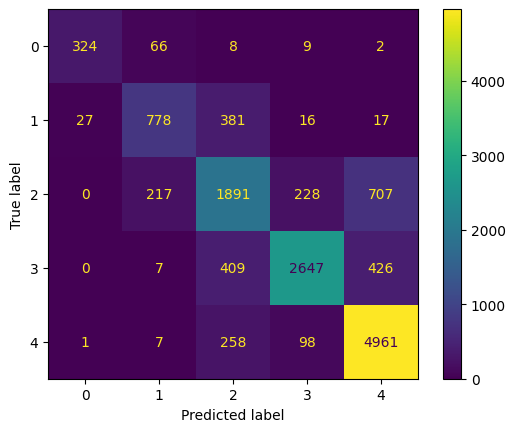

In [122]:
cmann = confusion_matrix(y_test, y_pred_class)
ConfusionMatrixDisplay(cmann).plot()

In [123]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       409
           1       0.72      0.64      0.68      1219
           2       0.64      0.62      0.63      3043
           3       0.88      0.76      0.82      3489
           4       0.81      0.93      0.87      5325

    accuracy                           0.79     13485
   macro avg       0.80      0.75      0.77     13485
weighted avg       0.79      0.79      0.78     13485



In [127]:
precisionANN = precision_score(y_test, y_pred_class, average='weighted')
recallANN = recall_score(y_test, y_pred_class, average='weighted')
f1ANN = f1_score(y_test, y_pred_class, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precisionANN:.4f}")
print(f"Recall: {recallANN:.4f}")
print(f"F1 Score: {f1ANN:.4f}")

Accuracy: 0.7861
Precision: 0.7870
Recall: 0.7861
F1 Score: 0.7833


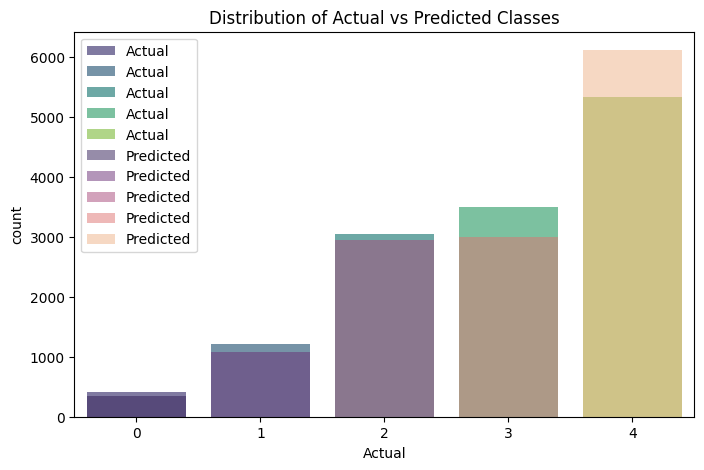

In [130]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_class})
plt.figure(figsize=(8, 5))
sn.countplot(x='Actual', data=df_pred, palette='viridis', alpha=0.7, label='Actual')
sn.countplot(x='Predicted', data=df_pred, palette='magma', alpha=0.5, label='Predicted')
plt.title('Distribution of Actual vs Predicted Classes')
plt.legend()
plt.show()

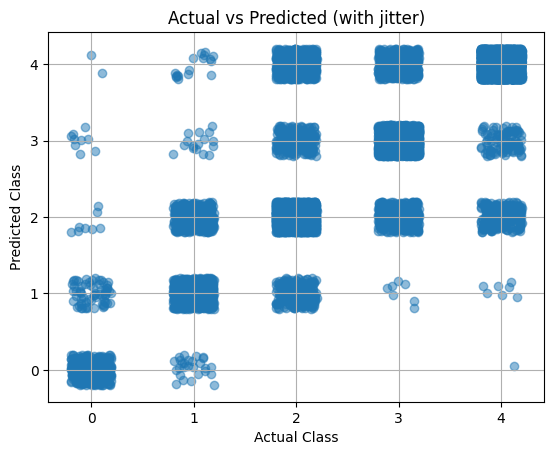

In [131]:
plt.scatter(y_test + np.random.uniform(-0.2, 0.2, size=len(y_test)),
            y_pred_class + np.random.uniform(-0.2, 0.2, size=len(y_pred_class)),
            alpha=0.5)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.title("Actual vs Predicted (with jitter)")
plt.grid(True)
plt.show()